In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key# Make a 'Get' request for the city weather.

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | port blair
Processing Record 3 of Set 1 | castro
Processing Record 4 of Set 1 | grand gaube
Processing Record 5 of Set 1 | tibati
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | upernavik
Processing Record 9 of Set 1 | sobolevo
Processing Record 10 of Set 1 | siocon
Processing Record 11 of Set 1 | harper
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | thunder bay
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | azul
Processing Record 20 of Set 1 | staraya toropa
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | hithadhoo
Pro

Processing Record 43 of Set 4 | hualmay
Processing Record 44 of Set 4 | aksay
Processing Record 45 of Set 4 | itupiranga
Processing Record 46 of Set 4 | denpasar
Processing Record 47 of Set 4 | fairbanks
Processing Record 48 of Set 4 | verkhnyaya inta
Processing Record 49 of Set 4 | katha
City not found. Skipping...
Processing Record 50 of Set 4 | yumen
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | rungata
City not found. Skipping...
Processing Record 3 of Set 5 | barrow
Processing Record 4 of Set 5 | benjamin aceval
Processing Record 5 of Set 5 | nizhneivkino
Processing Record 6 of Set 5 | okha
Processing Record 7 of Set 5 | barmer
Processing Record 8 of Set 5 | oranjemund
Processing Record 9 of Set 5 | havelock
Processing Record 10 of Set 5 | khonsa
Processing Record 11 of Set 5 | beinamar
Processing Record 12 of Set 5 | kaitangata
Processing Record 13 of Set 5 | itarema
Processing Record 14 of Set 5 | ban chang
Processing Record 15 of Set 5 | amderma
Cit

Processing Record 30 of Set 8 | kasra
City not found. Skipping...
Processing Record 31 of Set 8 | san policarpo
Processing Record 32 of Set 8 | ancud
Processing Record 33 of Set 8 | jalu
Processing Record 34 of Set 8 | tureni
Processing Record 35 of Set 8 | cap malheureux
Processing Record 36 of Set 8 | miles city
Processing Record 37 of Set 8 | matara
Processing Record 38 of Set 8 | vrangel
Processing Record 39 of Set 8 | sao sebastiao
Processing Record 40 of Set 8 | khatassy
Processing Record 41 of Set 8 | sarwar
Processing Record 42 of Set 8 | dien bien
City not found. Skipping...
Processing Record 43 of Set 8 | ust-kut
Processing Record 44 of Set 8 | valentin gomez farias
Processing Record 45 of Set 8 | turochak
Processing Record 46 of Set 8 | jaciara
Processing Record 47 of Set 8 | zeya
Processing Record 48 of Set 8 | rio tercero
Processing Record 49 of Set 8 | latung
Processing Record 50 of Set 8 | hofn
Processing Record 1 of Set 9 | hamilton
Processing Record 2 of Set 9 | privol

Processing Record 13 of Set 12 | sochi
Processing Record 14 of Set 12 | kattivakkam
Processing Record 15 of Set 12 | vila
Processing Record 16 of Set 12 | yeppoon
Processing Record 17 of Set 12 | maputo
Processing Record 18 of Set 12 | sanmenxia
Processing Record 19 of Set 12 | huesca
Processing Record 20 of Set 12 | contamana
Processing Record 21 of Set 12 | tamandare
Processing Record 22 of Set 12 | kebemer
City not found. Skipping...
Processing Record 23 of Set 12 | thanh hoa
Processing Record 24 of Set 12 | ranong
Processing Record 25 of Set 12 | yeniseysk
Processing Record 26 of Set 12 | russkaya polyana
Processing Record 27 of Set 12 | sandnessjoen
Processing Record 28 of Set 12 | launceston
Processing Record 29 of Set 12 | myitkyina
Processing Record 30 of Set 12 | waipawa
Processing Record 31 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 32 of Set 12 | roma
Processing Record 33 of Set 12 | bima
Processing Record 34 of Set 12 | dargaville
Processing Record 3

In [9]:
len(city_data)

576

In [43]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,67.59,67,47,16.62,AU,2022-06-16 04:34:49
1,Port Blair,11.6667,92.7500,86.04,74,75,9.22,IN,2022-06-16 04:34:49
2,Castro,-24.7911,-50.0119,50.22,89,8,1.79,BR,2022-06-16 04:34:50
3,Grand Gaube,-20.0064,57.6608,74.37,64,1,8.99,MU,2022-06-16 04:26:20
4,Tibati,6.4667,12.6333,64.90,97,96,1.43,CM,2022-06-16 04:30:40
5,Dikson,73.5069,80.5464,35.35,87,76,6.69,RU,2022-06-16 04:33:08
6,Ribeira Grande,38.5167,-28.7000,65.34,89,21,3.74,PT,2022-06-16 04:34:51
7,Upernavik,72.7868,-56.1549,29.53,68,100,4.74,GL,2022-06-16 04:34:51
8,Sobolevo,54.4299,31.8996,54.77,79,0,10.09,RU,2022-06-16 04:34:51
9,Siocon,7.7061,122.1353,84.88,75,55,4.45,PH,2022-06-16 04:34:52


In [44]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-06-16 04:34:49,-33.6500,115.3333,67.59,67,47,16.62
1,Port Blair,IN,2022-06-16 04:34:49,11.6667,92.7500,86.04,74,75,9.22
2,Castro,BR,2022-06-16 04:34:50,-24.7911,-50.0119,50.22,89,8,1.79
3,Grand Gaube,MU,2022-06-16 04:26:20,-20.0064,57.6608,74.37,64,1,8.99
4,Tibati,CM,2022-06-16 04:30:40,6.4667,12.6333,64.90,97,96,1.43
5,Dikson,RU,2022-06-16 04:33:08,73.5069,80.5464,35.35,87,76,6.69
6,Ribeira Grande,PT,2022-06-16 04:34:51,38.5167,-28.7000,65.34,89,21,3.74
7,Upernavik,GL,2022-06-16 04:34:51,72.7868,-56.1549,29.53,68,100,4.74
8,Sobolevo,RU,2022-06-16 04:34:51,54.4299,31.8996,54.77,79,0,10.09
9,Siocon,PH,2022-06-16 04:34:52,7.7061,122.1353,84.88,75,55,4.45


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [46]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

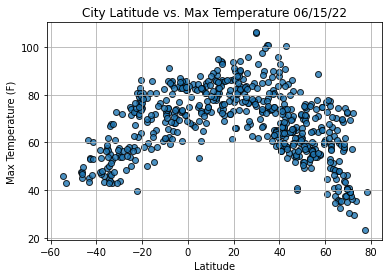

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

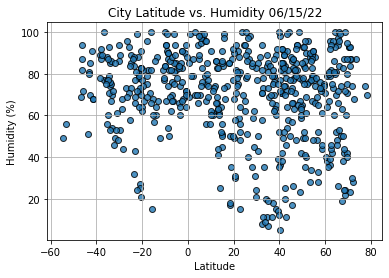

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

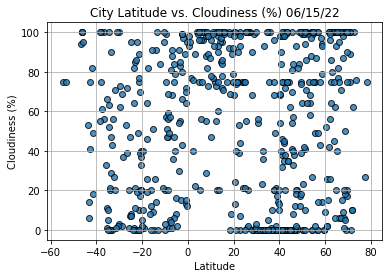

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

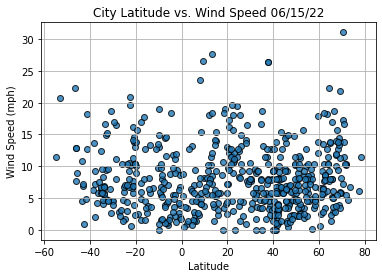

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [51]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [52]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

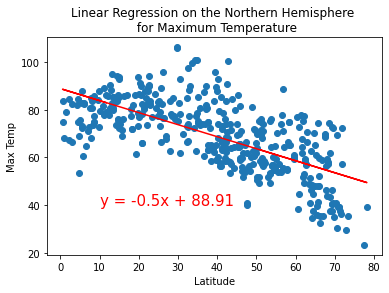

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

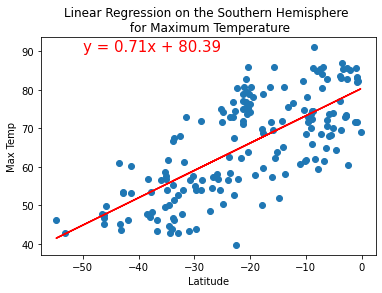

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

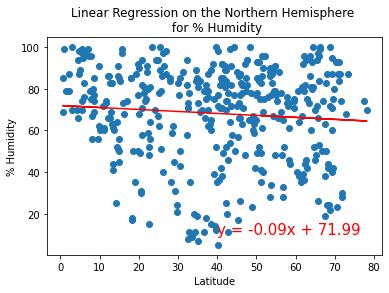

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

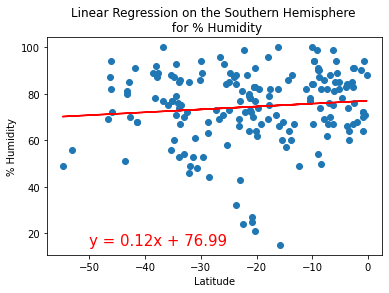

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

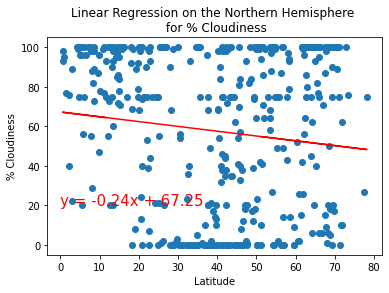

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (0,20))

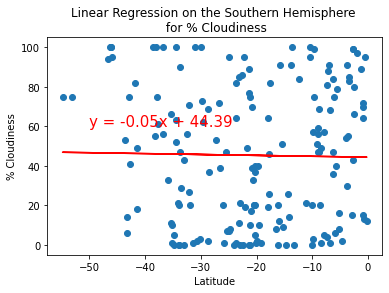

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

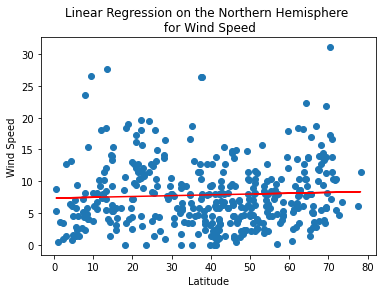

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

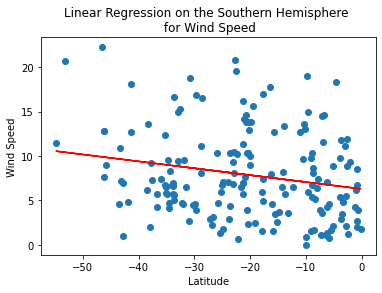

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))